In [133]:
import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

In [134]:
G = nx.read_gexf('graphs/graph.gexf')

In [135]:
def get_chapter_name(node):
    return int(node.split(' ')[-1].split('.')[0])

In [136]:
G_chapters = nx.Graph()

for u, v in G.edges():
    chapter_u = get_chapter_name(u)
    chapter_v = get_chapter_name(v)
    
    if chapter_u == chapter_v:
        continue

    if G_chapters.has_edge(chapter_u, chapter_v):
        G_chapters[chapter_u][chapter_v]['weight'] += 1
    else:
        G_chapters.add_edge(chapter_u, chapter_v, weight=1)

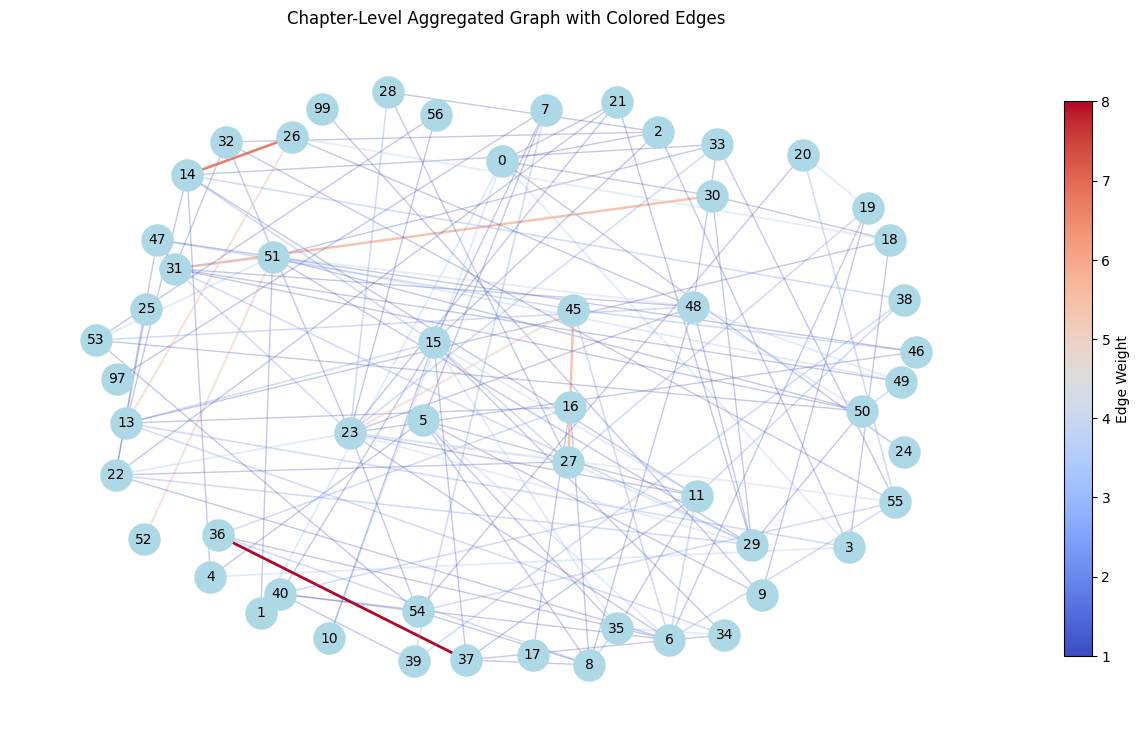

In [137]:
weights = [data['weight'] for _, _, data in G_chapters.edges(data=True)]
normalized_weights = (np.array(weights) - min(weights)) / (max(weights) - min(weights))

cmap = plt.get_cmap('coolwarm')
edge_colors = [cmap(weight) for weight in normalized_weights]

fig, ax = plt.subplots(figsize=(16, 9))

pos = nx.spring_layout(G_chapters, seed=42, k=2.5)

nx.draw_networkx_nodes(G_chapters, pos, node_size=500, node_color="lightblue", ax=ax)
nx.draw_networkx_labels(G_chapters, pos, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(G_chapters, pos, arrows=True, edge_color=edge_colors, 
                       width=normalized_weights + 1, alpha=np.clip(normalized_weights, 0.3, 1.0), ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label("Edge Weight")

ax.set_title("Chapter-Level Aggregated Graph with Colored Edges")
ax.axis("off")

plt.savefig('readme_images/chapter_graph.png', dpi=300, bbox_inches='tight')
plt.show()

In [140]:
# chapter_nodes = np.array(list(G_chapters.edges(data=True)))
# chapter_nodes[normalized_weights.argsort()[::-1]]

In [130]:
def get_part_name(node):
    part_boundaries = np.array([0, 7, 12, 17, 25, 28, 33, 40, 47, 56])
    chapter = get_chapter_name(node)

    return (np.argmax(chapter <= part_boundaries) + 1).item()

In [131]:
G_parts = nx.Graph()

for u, v in G.edges():
    part_u = get_part_name(u)
    part_v = get_part_name(v)
    
    if part_u == part_v:
        continue

    if G_parts.has_edge(part_u, part_v):
        G_parts[part_u][part_v]['weight'] += 1
    else:
        G_parts.add_edge(part_u, part_v, weight=1)

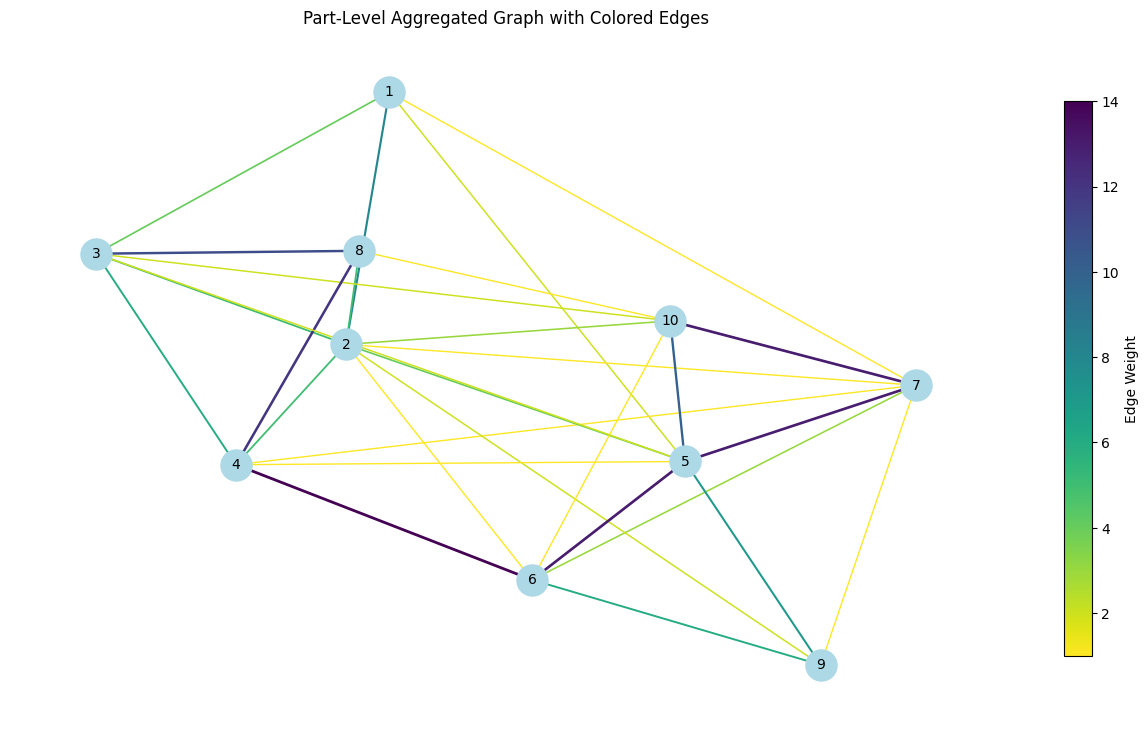

In [132]:
weights = [data['weight'] for _, _, data in G_parts.edges(data=True)]
normalized_weights = (np.array(weights) - min(weights)) / (max(weights) - min(weights))

cmap = plt.get_cmap('viridis_r')
edge_colors = [cmap(weight) for weight in normalized_weights]

fig, ax = plt.subplots(figsize=(16, 9))

pos = nx.spring_layout(G_parts, seed=42, k=2.5)

nx.draw_networkx_nodes(G_parts, pos, node_size=500, node_color="lightblue", ax=ax)
nx.draw_networkx_labels(G_parts, pos, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(G_parts, pos, arrows=True, edge_color=edge_colors, width=normalized_weights + 1, ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label("Edge Weight")

ax.set_title("Part-Level Aggregated Graph with Colored Edges")
ax.axis("off")

plt.savefig('readme_images/part_graph.png', dpi=300, bbox_inches='tight')
plt.show()